<a href="https://colab.research.google.com/github/howard-haowen/NLP-demos/blob/main/NTNU_talk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path

In [2]:
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "autolaunch": False,
        "enable_chalkboard": True,
        "scroll": True,
        "slideNumber": True,
        "controls": True,
        "progress": True,
        "history": True,
        "center": True,
        "width": "100%",
        "height": "100%",
        "theme": "beige",
        "transition": "concave",
        "start_slideshow_at": "selected"
     }
)

{'autolaunch': False,
 'enable_chalkboard': True,
 'scroll': True,
 'slideNumber': True,
 'controls': True,
 'progress': True,
 'history': True,
 'center': True,
 'width': '100%',
 'height': '100%',
 'theme': 'beige',
 'transition': 'concave',
 'start_slideshow_at': 'selected'}

# Outline


- My background
- NLP applications in business
- Doing linguistic analysis with programs 
- Machine learning 101
- Text representation
- Transfer learning
- Hands-on walkthrough (HOW)


# My background

## Education

![](https://github.com/howard-haowen/NLP-demos/raw/main/img/education_blue.png)

## Experience

- AI Engineer, Wisers Information Limited

- AI Engineer, Hamastar Technology

- Boya Postdoc Researcher (ÂçöÈõÖÂçöÂ£´Âæå), Peking University

- English Lecturer, National Taipei University of Technology

# NLP applications in business

![](https://camo.githubusercontent.com/7eb96ba311f989fbac5257f412a7f454f695015e7ce52d29ac24e10c8f34ef9e/68747470733a2f2f7777772e63796269616e742e636f6d2f77702d636f6e74656e742f75706c6f6164732f323032302f30312f434b432d4e61747572616c2d4c616e67756167652d50726f63657373696e672e706e67)

- Document-level sentiment

![](https://es.mathworks.com/discovery/sentiment-analysis/_jcr_content/mainParsys/image_695965980_copy.adapt.full.medium.jpg/1623215982364.jpg)

- Category-specific sentiment

![](https://www.voxco.com/wp-content/uploads/2021/09/Sentiment-Analysis-helps-improve-Customer-Experience1.jpg)

- Chatbot

![](https://cdn-images-1.medium.com/max/800/1*ILh55uR-pxe9lkotcUXurw.png)

- Revenues from the NLP market

![](https://github.com/howard-haowen/Chinese-NLP/raw/main/img/nlp_revenues.png)

# Doing linguistic analysis with programs 

![](https://miro.medium.com/max/1200/1*QUNXxPDm5b7CvExfhz9tkg.png)

## Programming languages

- Common languages in data science
![](https://lh5.googleusercontent.com/rUuG2OeUINVmeaV_OdWJXufjZsSL7EDtPA_TjYC8Mytu1OCmFAlY-fzC4wjzfFyxihcqQMkwJnvnAitqazQeIpr9UvKsBqoLLYDzjSrMSqKToWejWvZ86aTvEGZoHlae1Z5WEdz5)

- Languages across different roles
![](https://github.com/howard-haowen/NLP-demos/raw/main/img/languages-in-diff-ds-roles.JPG)

- If you've taken linguistics, you can learn any language, right?
- If linguists can decipher an alien language, they can also crack a programming language, right?

![](https://i.insider.com/5825e140dd089568398b474c?width=700)

## Developer tools

### Basic

- NLTK, a toolkit for starters
![](https://files.realpython.com/media/NLP-for-Beginners-Pythons-Natural-Language-Toolkit-NLTK_Watermarked.16a787c1e9c6.jpg)


- gensim, a tool that simplifies the process of converting texts to numbers
![](https://1.bp.blogspot.com/-zmBmmypQK-I/XVWGnsdXeeI/AAAAAAAABzI/BNAoSQ0sGo0WWih1KvvhXz-uNZYnQ_NvQCLcBGAs/s1600/image001.png)

- spaCy, an industrial-strength solution for end-to-end pipelines
![](https://files.realpython.com/media/How-to-Use-SpaCy-for-Natural-Language-Processing-in-Python_Watermarked_1.b363fc084a80.jpg)

### Advanced

- Deep learning frameworks
    - `PyTorch`, made by Facebook/Meta
    - `TensorFlow`, made by Google
    - `Transformers`, made by Hugging Face
 

![](https://venturebeat.com/wp-content/uploads/2019/09/hugging-face.png?w=1200&strip=all)

## Common NLP tasks

### Install tools

- spaCy

In [ ]:

!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download zh_core_web_md

In [4]:
import spacy

- jieba_tw, which is jieba optimized for Taiwan Mandarin

In [5]:
!git clone -l -s https://github.com/L706077/jieba-zh_TW.git jieba_tw
%cd jieba_tw

fatal: destination path 'jieba_tw' already exists and is not an empty directory.
/content/jieba_tw


In [6]:
import jieba

In [7]:
%cd ../

/content


### Tokenization

![](https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg)

In [8]:
nlp = spacy.load("zh_core_web_md")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'ner']

- Sample text: `ÂÆúÂÆ∂ÂÆ∂Â±ÖÊñ∞Â∫óÂ∫óÂ∫óÈï∑ÁöÑÂêçÂ≠óÂ•ΩÈï∑ÂñîÔºÅ` 
- This is what inspired me to come up with this example.
![](https://www.mirrormedia.com.tw/assets/images/20220123131828-73d4a66ef2493f7ea92c8a28f2ee4f71-tablet.png)

In [9]:
text = "ÂÆúÂÆ∂ÂÆ∂Â±ÖÊñ∞Â∫óÂ∫óÂ∫óÈï∑ÁöÑÂêçÂ≠óÂ•ΩÈï∑ÂñîÔºÅ"
doc = nlp(text)
tokens = [tok.text for tok in doc]
" | ".join(tokens)

'ÂÆúÂÆ∂ÂÆ∂ | Â±Ö | Êñ∞Â∫ó | Â∫ó | Â∫óÈï∑ | ÁöÑ | ÂêçÂ≠ó | Â•Ω | Èï∑Âñî | ÔºÅ'

In [10]:
text = "ÂÆúÂÆ∂ÂÆ∂Â±ÖÊñ∞Â∫óÂ∫óÂ∫óÈïøÁöÑÂêçÂ≠óÂ•ΩÈïøÂñîÔºÅ"
doc = nlp(text)
tokens = [tok.text for tok in doc]
" | ".join(tokens)

'ÂÆúÂÆ∂ÂÆ∂ | Â±Ö | Êñ∞Â∫ó | Â∫ó | Â∫óÈïø | ÁöÑ | ÂêçÂ≠ó | Â•ΩÈïøÂñî | ÔºÅ'

In [11]:
text = "ÂÆúÂÆ∂ÂÆ∂Â±ÖÊñ∞Â∫óÂ∫óÂ∫óÈï∑ÁöÑÂêçÂ≠óÂ•ΩÈï∑ÂñîÔºÅ"
tokens = jieba.cut(text) 
" | ".join(tokens)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.629 seconds.
Prefix dict has been built succesfully.


'ÂÆúÂÆ∂ | ÂÆ∂Â±Ö | Êñ∞Â∫óÂ∫ó | Â∫óÈï∑ | ÁöÑ | ÂêçÂ≠ó | Â•ΩÈï∑ | Âñî | ÔºÅ'

In [12]:
text = "ÂÆúÂÆ∂ÂÆ∂Â±ÖÊñ∞Â∫óÂ∫óÂ∫óÈïøÁöÑÂêçÂ≠óÂ•ΩÈïøÂñîÔºÅ"
tokens = jieba.cut(text) 
" | ".join(tokens)

'ÂÆúÂÆ∂ | ÂÆ∂Â±Ö | Êñ∞Â∫óÂ∫ó | Â∫ó | Èïø | ÁöÑ | ÂêçÂ≠ó | Â•Ω | Èïø | Âñî | ÔºÅ'

- The default tokenizer of spaCy is `jieba`, and we'll replace it with `jieba_tw` to get better results on Taiwan Mandarin.

In [13]:
from spacy.tokens import Doc

class TwTokenizer:
    def __init__(self, vocab):
        self.vocab = vocab

    def __call__(self, text):
        words =  list(jieba.cut(text))
        spaces = [False] * len(words)        
        return Doc(self.vocab, words=words, spaces=spaces)

In [14]:
nlp.tokenizer = TwTokenizer(nlp.vocab)

- You can replace the sentence stored in `text` with anything off the top of your head.

In [15]:
text = "ÂÆúÂÆ∂ÂÆ∂Â±ÖÊñ∞Â∫óÂ∫óÂ∫óÈï∑ÁöÑÂêçÂ≠óÂ•ΩÈï∑ÂñîÔºÅ"
doc = nlp(text)
tokens = [tok.text for tok in doc]
" | ".join(tokens)

'ÂÆúÂÆ∂ | ÂÆ∂Â±Ö | Êñ∞Â∫óÂ∫ó | Â∫óÈï∑ | ÁöÑ | ÂêçÂ≠ó | Â•ΩÈï∑ | Âñî | ÔºÅ'

### Part-of-speech (POS) tagger

![](https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg)

- `Token.pos_` for universal POS tags

In [16]:
for tok in doc:
    print(f"{tok.text} >>> {tok.pos_}")

ÂÆúÂÆ∂ >>> NOUN
ÂÆ∂Â±Ö >>> NOUN
Êñ∞Â∫óÂ∫ó >>> NOUN
Â∫óÈï∑ >>> NOUN
ÁöÑ >>> PART
ÂêçÂ≠ó >>> NOUN
Â•ΩÈï∑ >>> VERB
Âñî >>> INTJ
ÔºÅ >>> PUNCT


- `Token.tag_` for language-specific POS tags

In [17]:
for tok in doc:
    print(f"{tok.text} >>> {tok.tag_} | {spacy.explain(tok.tag_)}")

ÂÆúÂÆ∂ >>> NN | noun, singular or mass
ÂÆ∂Â±Ö >>> NN | noun, singular or mass
Êñ∞Â∫óÂ∫ó >>> NN | noun, singular or mass
Â∫óÈï∑ >>> NN | noun, singular or mass
ÁöÑ >>> DEG | associative ÁöÑ
ÂêçÂ≠ó >>> NN | noun, singular or mass
Â•ΩÈï∑ >>> VV | other verb
Âñî >>> IJ | interjection
ÔºÅ >>> PU | punctuation


### Dependency parser

![](https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg)

In [18]:
from spacy import displacy

In [19]:
text = "ÊàëÊÉ≥Ë¶Å‰∏â‰ªΩ2ËôüÈ§ê"
doc = nlp(text)
displacy.render(doc, style='dep',jupyter=True, options={'distance':130})

- `Token.dep_` for dependency tags

In [20]:
for tok in doc:
    print(f"{tok.text} >>> {tok.dep_}")

Êàë >>> nsubj
ÊÉ≥Ë¶Å >>> ROOT
‰∏â >>> nummod
‰ªΩ >>> mark:clf
2 >>> dep
ËôüÈ§ê >>> dobj


In [21]:
from spacy.matcher import Matcher

In [22]:
matcher = Matcher(nlp.vocab)
order_pattern = [{"POS": "NUM", "OP": "+"}, # for one or more NUM
                {"POS": "NOUN"}]
matcher.add("ORDER", [order_pattern])
matches = matcher(doc)

In [23]:
matches = matcher(doc)
for match_id, start, end in matches:
    span = doc[start:end]
    print(f"The order is >>> {span.text}")

The order is >>> 2ËôüÈ§ê
The order is >>> ‰ªΩ2ËôüÈ§ê
The order is >>> ‰∏â‰ªΩ2ËôüÈ§ê


### Named entity recognition (NER)

![](https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg)

In [24]:
text = """
Ôºà‰∏≠Â§ÆÁ§æÔºâCOVID-19Áñ´ÊÉÖ‰ΩøÈÅ†Ë∑ù„ÄÅÂØ¶È´îÁõ∏ËºîÁõ∏ÊàêÁöÑÊ®°ÂºèÊàêÁÇ∫ÊïôÂ≠∏Â∏∏ÊÖãÔºåÂè∞ÁÅ£Â∏´ÁØÑÂ§ßÂ≠∏‰ªäÂ§©ÂÆ£Â∏ÉÊàêÁ´ãÁ∂≤Ë∑ØÂ§ßÂ≠∏Ëæ¶ÂÖ¨ÂÆ§Ôºå‰∏¶ÈñãË®≠3ÂÄãÊï∏‰ΩçÁ¢©Â£´Âú®ËÅ∑Â∞àÁè≠ÔºåÂêëÂÖ®‰∏ñÁïåÊãõÁîü„ÄÇ
Âè∞Â∏´Â§ß‰ªäÂ§©ËàâËæ¶Ë®òËÄÖÊúÉÁÇ∫Á∂≤Ë∑ØÂ§ßÂ≠∏Ëæ¶ÂÖ¨ÂÆ§Êè≠ÁâåÔºåÊ†°Èï∑Âê≥Ê≠£Â∑±Ë°®Á§∫ÔºåÂú®COVID-19Ôºà2019Âπ¥ÂÜ†ÁãÄÁóÖÊØíÁñæÁóÖÔºâÁñ´ÊÉÖ‰∏ãÔºåÁ∑ö‰∏äÊïôÂ≠∏Â§ßÂπÖÂ¢ûÂä†ÔºåÊïôËÇ≤ÈÉ®‰πüÂ§ßÂπÖÊîæÂØ¨Êï∏‰ΩçÂ≠∏ÁøíÂ≠∏Âà∂ÂèäÊãõÁîüÂ∞çË±°ÈôêÂà∂„ÄÇ
"""
doc = nlp(text)
displacy.render(doc, style='ent',jupyter=True)

- `Span.label_` for NER tags

In [25]:
for span in doc.ents:
    print(f"{span.text} >>> {span.label_}")

‰∏≠Â§ÆÁ§æ >>> ORG
COVID >>> GPE
19 >>> CARDINAL
Âè∞ÁÅ£Â∏´ÁØÑÂ§ßÂ≠∏ >>> ORG
‰ªäÂ§© >>> DATE
3 >>> CARDINAL
Âè∞Â∏´Â§ß >>> GPE
‰ªäÂ§© >>> DATE
COVID >>> GPE
2019Âπ¥ >>> DATE
Á∑ö‰∏ä >>> GPE
ÊïôËÇ≤ÈÉ® >>> ORG


In [26]:
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

In [27]:
phrase_matcher = PhraseMatcher(nlp.vocab)
ntnu_terms = ['Âè∞ÁÅ£Â∏´Â§ß','Âè∞Â∏´Â§ß',]
phrase_matcher.add('NTNU', list(nlp.pipe(ntnu_terms)))

In [28]:
matches = phrase_matcher(doc)
org_spans = [span for span in doc.ents if span.label_=="ORG"]
for match_id, start, end in matches:
    new_ent = Span(doc, start, end, "ORG")
    org_spans.append(new_ent)
doc.ents = org_spans
displacy.render(doc, style='ent',jupyter=True)

- You can interact with models without knowing any code by using this Web APP that I created.



In [29]:
from IPython.display import IFrame

In [30]:
IFrame(src='https://share.streamlit.io/howard-haowen/spacy-streamlit/app.py', width=700, height=1000)

# Machine learning 101

- Classical programming vs machine learning

![](https://kislayverma.com/wp-content/uploads/2021/06/Screenshot-2021-06-17-at-11.31.04-PM.png)

- ML models learn from instances, so it's not surprising that they make mistakes.

![](https://img-9gag-fun.9cache.com/photo/aMKpRdV_460s.jpg)

- AI > ML > DL

![](https://monkeylearn.com/static/83ef48b5cf3020a618d878835a6d2167/2948a/image12.webp)

- All forms of data, be it images, sounds, or texts, have to be first converted into numbers to be fed into a training algorithm. 
- The process of transforming raw data to a sequence of numbers (i.e. vectors) is called `feature engineering`.

![](https://miro.medium.com/max/807/1*a-DZhoPMZhONLf-xv7ob8Q.png)

- Two stages of a machine learning project: training and prediction
 * Taking sentiment analysis as an example

![](https://monkeylearn.com/static/74491b164c59b243e5f6d601c0365fbf/76384/ml-process.webp)

# Text representation

## Representing images

![](http://www.paulvangent.com/wp-content/uploads/2018/08/J2FOX3F.jpg)

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
!wget -O sample.jpg http://www.paulvangent.com/wp-content/uploads/2018/08/J2FOX3F.jpg

--2022-03-19 02:04:11--  http://www.paulvangent.com/wp-content/uploads/2018/08/J2FOX3F.jpg
Resolving www.paulvangent.com (www.paulvangent.com)... 46.30.213.30, 2a02:2350:5:10a:f2:d80c:fe33:f3de
Connecting to www.paulvangent.com (www.paulvangent.com)|46.30.213.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50600 (49K) [image/jpeg]
Saving to: ‚Äòsample.jpg‚Äô

sample.jpg          100%[===================>]  49.41K  93.3KB/s    in 0.5s    

2022-03-19 02:04:12 (93.3 KB/s) - ‚Äòsample.jpg‚Äô saved [50600/50600]



In [3]:
img = cv2.imread('sample.jpg')
img.shape

(412, 640, 3)

In [34]:
print(img)

[[[245 247 248]
  [104 106 106]
  [ 50  50  50]
  ...
  [ 26  26  32]
  [ 26  26  32]
  [ 27  27  33]]

 [[240 242 243]
  [ 99 101 102]
  [ 45  45  45]
  ...
  [ 19  19  25]
  [ 19  19  25]
  [ 19  19  25]]

 [[242 246 247]
  [102 106 107]
  [ 48  50  50]
  ...
  [ 20  19  28]
  [ 21  20  29]
  [ 21  20  29]]

 ...

 [[234 243 240]
  [ 79  87  86]
  [ 15  24  27]
  ...
  [ 84  84  84]
  [ 83  83  83]
  [ 82  82  82]]

 [[235 244 241]
  [ 79  87  86]
  [ 16  25  28]
  ...
  [ 84  84  84]
  [ 83  83  83]
  [ 82  82  82]]

 [[235 244 241]
  [ 80  88  87]
  [ 16  25  28]
  ...
  [ 84  84  84]
  [ 83  83  83]
  [ 82  82  82]]]


In [6]:
img_gray = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)
img_gray.shape

(412, 640)

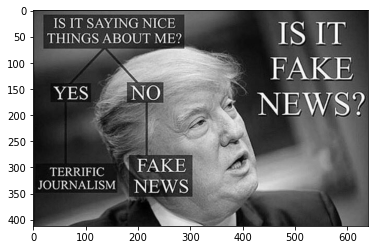

In [7]:
plt.imshow(img_gray, cmap='gray')
plt.show()

- You can change `100` below to any number between 1 and 255.

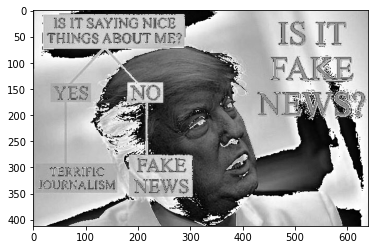

In [8]:
modified_img = img_gray - 100
plt.imshow(modified_img, cmap='gray')
plt.show()

## Representing texts

- Compared with images, texts are much harder to represent in numbers.
- There're three major types of text representation:
    * Symoblic representation
    * Distribut**ional** representation
    * Distribut**ed** representation

## Download a dataset

In [39]:
!wget -O Dcard.db https://github.com/howard-haowen/NLP-demos/raw/main/Dcard_20220304.db

--2022-03-18 13:00:53--  https://github.com/howard-haowen/NLP-demos/raw/main/Dcard_20220304.db
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/howard-haowen/NLP-demos/main/Dcard_20220304.db [following]
--2022-03-18 13:00:53--  https://raw.githubusercontent.com/howard-haowen/NLP-demos/main/Dcard_20220304.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151552 (148K) [application/octet-stream]
Saving to: ‚ÄòDcard.db‚Äô

Dcard.db            100%[===================>] 148.00K  --.-KB/s    in 0.02s   

2022-03-18 13:00:53 (6.74 MB/s) - ‚ÄòDcard.db‚Äô saved [151552/151552]



In [40]:
import sqlite3
import pandas as pd

In [41]:
conn = sqlite3.connect("Dcard.db")  
data = pd.read_sql("SELECT * FROM Posts;", conn)
data.head()

createdAt                       title  \
0  2022-03-04T07:54:19.886Z                 Â∞àÈ°åÈúÄË¶ÅÊï∏Êìöü•∫ü•∫Âπ´Â°´ÔΩû   
1  2022-03-04T07:42:59.512Z                    #Ë©¢Âïè ÊâæË°£Êúçü•≤   
2  2022-03-04T07:24:25.147Z  #ÈªëÁâπ Á∂≤Ë≥º50% FIFTY PERCENTË´ã‰∏âÊÄù   
3  2022-03-04T06:39:13.017Z                         Â∞ãË°£Êúç   
4  2022-03-04T06:28:06.137Z                      #Ë©¢Âïè ÊÉ≥Âïè   

                                             excerpt categories  \
0                                    Â∏åÊúõÂêÑ‰ΩçËÉΩËä±ÂÄã20ÁßíÂπ´ÊàëÂ°´‰∏Ä‰∏ã              
1            ÊÉ≥ÊâæÈÄôÂ•óË°£Êúçü•≤Ôºå‰ΩÜÁôºÁèæ‰∏çÁü•ÈÅìË©≤Áî®‰ªÄÈ∫ºÈóúÈçµÂ≠óÊâæÔºåÔºàÂúñÊòØËçâÂ±ØÂõù‰ªîÁöÑÊ†°ÂúíÊºîÂî±ÊúÉÊà™ÂúñÔºâ         Ë©¢Âïè   
2  Âõ†ÁÇ∫ÊñáÊúÉÊúâÈªûÈï∑ÔºåÂÖàË™™ÁµêË´ñÊòØÔºå50%ÊòØÁõÆÂâçÁ∂≤Ë≥ºÈÅéÁöÑÂπ≥Âè∞ÈÄÄË≤®ÊúÄÈ∫ªÁÖ©ÁöÑ‰∏ÄÂÆ∂ÔºåÁîöËá≥ÊàëË™çÁÇ∫Ê†πÊú¨ÊòØÂàªÊÑèÂàÅ...              
3                         ‰æÜÊ∫êÔºöË¶∫ÂæóÂë±ÂêâÈÄôË•ØË°´Â•ΩÂ•ΩÁúã~~ÔºåÊàñÊúâ‰∫∫Áü•ÈÅìÊúâÈ°û‰ººÁöÑÂóé              
4  ÂêÑ‰ΩçÔºåÂõ†ÁÇ∫ÈÄôÂÄãË≠â‰ª∂Â§æËá∫ÁÅ£Ë≤∑‰∏çÂà∞ÔºåÊòØÁæéÂúãoutlet ÁöÑÈôêÈáèÁâàË≤®ÔºåÊâÄ‰ª•Âú®‰ª•‰∏ãÁöÑÈÄôÈñìËù¶ÁöÆ‰∏äË≤∑Ôºå‰ΩÜ...         Ë©¢Âïè   

                     topics forum_en forum_zh  
0                            dressup       Á©øÊê≠  
1  Ë°£Êúç | ÈûãÂ≠ê | Ë°£Áâ© | Áî∑ÁîüÁ©øÊê≠ | Â∞ãÊâæ  dressup       Á©øÊê≠  
2  ÈªëÁâπ | Á∂≤Ë≥º | ‰∏âÊÄù | ÈÄÄË≤® | ÂîÆÂæåÊúçÂãô  dressup       Á©øÊê≠  
3     Ë°£Êúç | Â∞ãÊâæ | Êó•Â∏∏Á©øÊê≠ | Áî∑ÁîüÁ©øÊê≠  dressup       Á©øÊê≠  
4      Á©øÊê≠ | ÈñíËÅäÁâà | ÈñíËÅäÊéíËß£ | ÂÅáË≤®  dressup       Á©øÊê≠

In [42]:
data.groupby("forum_en").size()

forum_en
dressup         30
food            30
funny           30
girl            30
horoscopes      30
makeup          30
money           30
netflix         30
relationship    30
talk            30
trending        30
youtuber        30
dtype: int64

In [43]:
data.shape

(360, 7)

In [44]:
cols = ["excerpt", "forum_en", "forum_zh"]
df = data[cols]
df

excerpt  forum_en  forum_zh
0                                      Â∏åÊúõÂêÑ‰ΩçËÉΩËä±ÂÄã20ÁßíÂπ´ÊàëÂ°´‰∏Ä‰∏ã   dressup        Á©øÊê≠
1              ÊÉ≥ÊâæÈÄôÂ•óË°£Êúçü•≤Ôºå‰ΩÜÁôºÁèæ‰∏çÁü•ÈÅìË©≤Áî®‰ªÄÈ∫ºÈóúÈçµÂ≠óÊâæÔºåÔºàÂúñÊòØËçâÂ±ØÂõù‰ªîÁöÑÊ†°ÂúíÊºîÂî±ÊúÉÊà™ÂúñÔºâ   dressup        Á©øÊê≠
2    Âõ†ÁÇ∫ÊñáÊúÉÊúâÈªûÈï∑ÔºåÂÖàË™™ÁµêË´ñÊòØÔºå50%ÊòØÁõÆÂâçÁ∂≤Ë≥ºÈÅéÁöÑÂπ≥Âè∞ÈÄÄË≤®ÊúÄÈ∫ªÁÖ©ÁöÑ‰∏ÄÂÆ∂ÔºåÁîöËá≥ÊàëË™çÁÇ∫Ê†πÊú¨ÊòØÂàªÊÑèÂàÅ...   dressup        Á©øÊê≠
3                           ‰æÜÊ∫êÔºöË¶∫ÂæóÂë±ÂêâÈÄôË•ØË°´Â•ΩÂ•ΩÁúã~~ÔºåÊàñÊúâ‰∫∫Áü•ÈÅìÊúâÈ°û‰ººÁöÑÂóé   dressup        Á©øÊê≠
4    ÂêÑ‰ΩçÔºåÂõ†ÁÇ∫ÈÄôÂÄãË≠â‰ª∂Â§æËá∫ÁÅ£Ë≤∑‰∏çÂà∞ÔºåÊòØÁæéÂúãoutlet ÁöÑÈôêÈáèÁâàË≤®ÔºåÊâÄ‰ª•Âú®‰ª•‰∏ãÁöÑÈÄôÈñìËù¶ÁöÆ‰∏äË≤∑Ôºå‰ΩÜ...   dressup        Á©øÊê≠
..                                                 ...       ...       ...
355  Êò®Â§©‰∏ä‰∫ÜÁ¨¨‰∏ÄÊîØÂΩ±ÁâáÔºå‰πãÂâçÊúâÁôºÈÅéÊ≤íÊúâÁ∑öÊ¢ùÁöÑÂãïÁï´ÂΩ±ÁâáÔºåÊñ∞ÁöÑÈ†ªÈÅìÊîπÊàêÊúâÁ∑öÊ¢ùÁöÑÔºåÊÑüË¶∫Â§ßÂÆ∂Â•ΩÂÉèÊØîËºÉÂñúÊ≠°...  youtuber  YouTuber
356     ‰ªäÂ§©ÂÖ®Âè∞ÁÅ£Â§ßÂÅúÈõªÔºåÊáâË©≤ÈÅéÂπæÂ§©Â∞±ÊúÉÊúâÂÄãÊà¥Èù¢ÂÖ∑ÁöÑÂá∫‰æÜË™™Ôºå‰∏ÄÂÆöÊòØ‰∏≠ÂÖ±‚Ä¶‚Ä¶ÔºåÊàëÂæû‰∏äÂÄãÂΩ±ÁâáÂ∞±È†êÊ∏¨‰∫Ü‚Ä¶‚Ä¶  youtuber  YouTuber
357  ÊÉ≥ÂïèÊúâÊ≤íÊúâ‰∫∫Áü•ÈÅìÈòøÁ•ûÂíåÊîæÁÅ´ÊòØË™çË≠òÈÇÑÊòØÊúâÁµêÈÅé‰ªÄÈ∫º‰ªá‰πãÈ°ûÁöÑÂóéÔºüÈ¶ñÂÖàÊàëÂÄã‰∫∫Âü∫Êú¨Ê≤íÈóúÊ≥®ÈÅéÊîæÁÅ´Ôºå‰ΩÜÊòØÊúÄ...  youtuber  YouTuber
358  ÁÑ°ÊÑèÂºïÊà∞ÔºåÂñÆÁ¥îÂàÜ‰∫´ÊàëÁöÑËßÄÂØüËàáÂÄã‰∫∫ÊÉ≥Ê≥ïÔΩûÈÄôÂπæÂ§©Áúã‰∫ÜDcardÂπæÁØáÈóúÊñºRice& ShineÁöÑË≤º...  youtuber  YouTuber
359  ÂìàÂìàÂìàÂìàÔºåÊ≤íÈåØÊàëÂ∞±ÊòØË¶™ÂèãÂúò‰æÜ‰ªãÁ¥π‰∏ÄÂÄãÊàëË¶∫ÂæóÂæàÂåó‰∏ÉÁöÑÈ†ªÈÅìÔºåÁèæÂú®ËßÄÁúãÁúüÁöÑ‰ΩéÁöÑÂèØÊÜêÔºå‰πüÊ≤í‰∫ãÂï¶ÔºåÂ∞±Â§ö...  youtuber  YouTuber

[360 rows x 3 columns]

- You can change `62` below to any number between 0 and 359.

In [45]:
docid = 62
sample_text = df.loc[docid, "excerpt"]
sample_text

'Êò®Â§©Âú®Â±àËá£Ê∞èË≤∑ÁöÑÊñ∞ÂìÅÔºåÊâãÂàÄ‰æÜÂàÜ‰∫´ÂøÉÂæóÔºÅÔºÅÔºÅÔºÅÔºåü•ëÂÉπÊ†ºÔºö $305/320mlÔΩûÔΩûÂæàÂ§ßÊ¢ùÔºåÊàêÂàÜ‰∏ªÊâìÁ∂≠ÁîüÁ¥†BÁæ§„ÄÅÁ¥ÖÁü≥Ê¶¥Ë∑üÊû∏ÊùûÔºåË∑üÂÖ∂‰ªñÂÖ©Ê¨æ‰∏ÄÊ®£ÈÉΩÊòØÊûúËêÉÁöÑÁæéÁôΩÔºåÈÄôÊ¨æÊúâÂæàÂ∞ëÂ•≥ÁöÑËéìÊûúÈ¶ôÔºåÁîúÁîúÁöÑÊÑüË¶∫ÔºåÂë≥ÈÅìÊúâÈªûÂÉèÁæéÂúã'

## Preprocess texts

![](https://res.cloudinary.com/practicaldev/image/fetch/s--95IEaI7P--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/x9qz2q3gyz494rwz3i7q.png)

In [46]:
def preprocess_text(text: str) -> list:
    doc = nlp.make_doc(text)
    res = [tok for tok in doc if not tok.is_punct]
    res = [tok for tok in res if not tok.is_stop] # stop words
    res = [tok for tok in res if not tok.like_email]
    res = [tok for tok in res if not tok.like_url]
    res = [tok for tok in res if not tok.like_num]
    res = [tok for tok in res if not tok.is_ascii]
    res = [tok.text for tok in res if not tok.is_space]
    return res

- Think of stop words as highly frequent words, typically those that non-native speakers tend to make mistakes on.

![](https://www.computerhope.com/jargon/s/stop-words.png)

In [47]:
processed_text = preprocess_text(sample_text)
print(f"Before preprocessing:\n {sample_text}")
print(f"After preprocessing:\n {processed_text}")

Before preprocessing:
 Êò®Â§©Âú®Â±àËá£Ê∞èË≤∑ÁöÑÊñ∞ÂìÅÔºåÊâãÂàÄ‰æÜÂàÜ‰∫´ÂøÉÂæóÔºÅÔºÅÔºÅÔºÅÔºåü•ëÂÉπÊ†ºÔºö $305/320mlÔΩûÔΩûÂæàÂ§ßÊ¢ùÔºåÊàêÂàÜ‰∏ªÊâìÁ∂≠ÁîüÁ¥†BÁæ§„ÄÅÁ¥ÖÁü≥Ê¶¥Ë∑üÊû∏ÊùûÔºåË∑üÂÖ∂‰ªñÂÖ©Ê¨æ‰∏ÄÊ®£ÈÉΩÊòØÊûúËêÉÁöÑÁæéÁôΩÔºåÈÄôÊ¨æÊúâÂæàÂ∞ëÂ•≥ÁöÑËéìÊûúÈ¶ôÔºåÁîúÁîúÁöÑÊÑüË¶∫ÔºåÂë≥ÈÅìÊúâÈªûÂÉèÁæéÂúã
After preprocessing:
 ['Êò®Â§©', 'Â±àËá£Ê∞è', 'Ë≤∑', 'Êñ∞ÂìÅ', 'ÊâãÂàÄ', '‰æÜ', 'ÂàÜ‰∫´', 'ÂøÉÂæó', 'ü•ë', 'ÂÉπÊ†º', 'Ê¢ù', 'ÊàêÂàÜ', '‰∏ªÊâì', 'Á∂≠ÁîüÁ¥†', 'BÁæ§', 'Á¥Ö', 'Áü≥Ê¶¥', 'Êû∏Êùû', 'ÂÖ©', 'Ê¨æ', '‰∏ÄÊ®£', 'ÊûúËêÉ', 'ÁæéÁôΩ', 'ÈÄô', 'Ê¨æÊúâ', 'Â∞ëÂ•≥', 'ËéìÊûú', 'È¶ô', 'ÁîúÁîú', 'ÊÑüË¶∫', 'Âë≥ÈÅì', 'ÊúâÈªû', 'ÁæéÂúã']


In [ ]:
df.loc[:,"toks"] = df["excerpt"].apply(preprocess_text)

In [49]:
df.head()

excerpt forum_en forum_zh  \
0                                    Â∏åÊúõÂêÑ‰ΩçËÉΩËä±ÂÄã20ÁßíÂπ´ÊàëÂ°´‰∏Ä‰∏ã  dressup       Á©øÊê≠   
1            ÊÉ≥ÊâæÈÄôÂ•óË°£Êúçü•≤Ôºå‰ΩÜÁôºÁèæ‰∏çÁü•ÈÅìË©≤Áî®‰ªÄÈ∫ºÈóúÈçµÂ≠óÊâæÔºåÔºàÂúñÊòØËçâÂ±ØÂõù‰ªîÁöÑÊ†°ÂúíÊºîÂî±ÊúÉÊà™ÂúñÔºâ  dressup       Á©øÊê≠   
2  Âõ†ÁÇ∫ÊñáÊúÉÊúâÈªûÈï∑ÔºåÂÖàË™™ÁµêË´ñÊòØÔºå50%ÊòØÁõÆÂâçÁ∂≤Ë≥ºÈÅéÁöÑÂπ≥Âè∞ÈÄÄË≤®ÊúÄÈ∫ªÁÖ©ÁöÑ‰∏ÄÂÆ∂ÔºåÁîöËá≥ÊàëË™çÁÇ∫Ê†πÊú¨ÊòØÂàªÊÑèÂàÅ...  dressup       Á©øÊê≠   
3                         ‰æÜÊ∫êÔºöË¶∫ÂæóÂë±ÂêâÈÄôË•ØË°´Â•ΩÂ•ΩÁúã~~ÔºåÊàñÊúâ‰∫∫Áü•ÈÅìÊúâÈ°û‰ººÁöÑÂóé  dressup       Á©øÊê≠   
4  ÂêÑ‰ΩçÔºåÂõ†ÁÇ∫ÈÄôÂÄãË≠â‰ª∂Â§æËá∫ÁÅ£Ë≤∑‰∏çÂà∞ÔºåÊòØÁæéÂúãoutlet ÁöÑÈôêÈáèÁâàË≤®ÔºåÊâÄ‰ª•Âú®‰ª•‰∏ãÁöÑÈÄôÈñìËù¶ÁöÆ‰∏äË≤∑Ôºå‰ΩÜ...  dressup       Á©øÊê≠   

                                                toks  
0                             [Â∏åÊúõ, ‰Ωç, Ëä±, ÂÄã, Áßí, Âπ´, Â°´]  
1  [ÊÉ≥, Êâæ, ÈÄô, Â•ó, Ë°£Êúç, ü•≤, ÁôºÁèæ, Ë©≤, Áî®‰ªÄÈ∫º, ÈóúÈçµÂ≠ó, Êâæ, ÂúñÊòØ, ËçâÂ±Ø...  
2  [Âõ†ÁÇ∫, ÊñáÊúÉ, ÊúâÈªû, Èï∑, ÂÖà, Ë™™, ÁµêË´ñ, Á∂≤Ë≥º, ÈÅé, Âπ≥Âè∞, ÈÄÄË≤®, È∫ªÁÖ©, ÂÆ∂...  
3                     [‰æÜÊ∫ê, Ë¶∫Âæó, Âë±Âêâ, ÈÄô, Ë•ØË°´, Â•ΩÂ•Ω, È°û‰ºº, Âóé]  
4  [‰Ωç, Âõ†ÁÇ∫, ÈÄô, ÂÄã, Ë≠â‰ª∂, Â§æ, Ëá∫ÁÅ£, Ë≤∑‰∏çÂà∞, ÁæéÂúã, ÈôêÈáèÁâà, Ë≤®, ÈÄô, Èñì...

In [51]:
df["forum_en"].unique()

array(['dressup', 'relationship', 'makeup', 'food', 'horoscopes', 'talk',
       'trending', 'money', 'funny', 'girl', 'netflix', 'youtuber'],
      dtype=object)

- You can choose any forum name from above and append it to `selected_forums`.

In [52]:
selected_forums = ["trending", "netflix", "money", "makeup", "dressup"]
forum_filt = df["forum_en"].isin(selected_forums)
sample_df = df[forum_filt]
sample_df.reset_index(inplace=True, drop=True)

- One common way to get rid of outliers is to filter by text length. 

In [53]:
sample_df[sample_df["excerpt"].apply(len)<=10]

index    excerpt  forum_en forum_zh              toks
8        8              dressup       Á©øÊê≠                []
29      29              dressup       Á©øÊê≠                []
39      69  ÊòØÂú®Á¨ëÂ±ÅÁ¨ëÂï¶ü§∑‚ÄçÔ∏è    makeup       ÁæéÂ¶ù  [Á¨ë, Â±ÅÁ¨ë, ü§∑, ‚Äç, Ô∏è]
58      88    Â¶ÇÈ°åÔºåË´ãÊïôÂêÑ‰Ωç    makeup       ÁæéÂ¶ù       [Â¶ÇÈ°å, Ë´ãÊïô, ‰Ωç]
66     186             trending       ÊôÇ‰∫ã                []
78     198    ÊÑüË¶∫Èõ¢Êà∞Áà≠Â•ΩËøë  trending       ÊôÇ‰∫ã   [ÊÑüË¶∫, Èõ¢, Êà∞Áà≠, Â•ΩËøë]
82     202             trending       ÊôÇ‰∫ã                []
88     208       ÈáëÊõ≤‰∏çÊïó  trending       ÊôÇ‰∫ã           [ÈáëÊõ≤, Êïó]
100    220                money       ÁêÜË≤°                []
144    324              netflix  Netflix                []

In [54]:
sample_df = sample_df[sample_df["excerpt"].apply(len)>10]

In [55]:
sample_df.reset_index(inplace=True, drop=True)

In [56]:
sample_df.shape

(140, 6)

## Symbolic representation

### TF-IDF (term frequency-inverse document frequency)

![](https://miro.medium.com/max/1000/1*vWWmJlDykVRkjg9c38VbxQ.png)

- TF-IDF is based on the Bag-of-Words (BOW) model.
![](https://okan.cloud/posts/2021-04-08-text-vectorization-using-python-term-document-matrix/bow.png)

In [50]:
from gensim import corpora, models

- A gensim dictionary stores a mapping between words and their integer IDs.

In [57]:
texts = sample_df["toks"].to_list()
dictionary = corpora.Dictionary(texts)
print(dictionary.token2id)

{'‰Ωç': 0, 'ÂÄã': 1, 'Â°´': 2, 'Â∏åÊúõ': 3, 'Âπ´': 4, 'Áßí': 5, 'Ëä±': 6, 'Âõù‰ªî': 7, 'ÂúñÊòØ': 8, 'Â•ó': 9, 'ÊÉ≥': 10, 'Êà™Âúñ': 11, 'Êâæ': 12, 'Ê†°Âúí': 13, 'ÊºîÂî±ÊúÉ': 14, 'Áî®‰ªÄÈ∫º': 15, 'ÁôºÁèæ': 16, 'ËçâÂ±Ø': 17, 'Ë°£Êúç': 18, 'Ë©≤': 19, 'ÈÄô': 20, 'ÈóúÈçµÂ≠ó': 21, '\U0001f972': 22, '‰ª•ÁÇ∫': 23, '‰øùÈöú': 24, 'ÂÖà': 25, 'ÂàÅÈõ£': 26, 'ÂàªÊÑè': 27, 'ÂéüÊú¨': 28, 'ÂîÆÂæå': 29, 'Âõ†ÁÇ∫': 30, 'ÂÆ∂': 31, 'ÂØ¶È´îÂ∫ó': 32, 'Âπ≥Âè∞': 33, 'ÂøµÈ†≠': 34, 'ÊâìÊ∂à': 35, 'ÊñáÊúÉ': 36, 'ÊúÉ': 37, 'ÊúâÈªû': 38, 'ÊúçÂãô': 39, 'Ê≠£': 40, 'ÊØîËºÉ': 41, 'Ê≤íÊÉ≥Âà∞': 42, 'Á≥ü': 43, 'ÁµêË´ñ': 44, 'Á∂≤Ë≥º': 45, 'Ë™çÁÇ∫': 46, 'Ë™™': 47, 'ËÆì': 48, 'ÈÄÄË≤®': 49, 'ÈÅáÈÅé': 50, 'ÈÅé': 51, 'Èï∑': 52, 'È°ßÂÆ¢': 53, 'È∫ªÁÖ©': 54, '‰æÜÊ∫ê': 55, 'Âë±Âêâ': 56, 'Âóé': 57, 'Â•ΩÂ•Ω': 58, 'Ë•ØË°´': 59, 'Ë¶∫Âæó': 60, 'È°û‰ºº': 61, '‰∏çÊúÉ': 62, 'ÂÅá': 63, 'Â§æ': 64, 'ÁæéÂúã': 65, 'Ëá∫ÁÅ£': 66, 'Ëù¶ÁöÆ': 67, 'Ë´ã': 68, 'Ë¨ùË¨ù': 69, 'Ë≠â‰ª∂': 70, 'Ë≤®': 71, 'Ë≤∑': 72, 'Ë≤∑‰∏çÂà∞': 73, 'Ë≤∑Âà∞': 74, 'ÈÄôÊúÉ': 75, '

In [58]:
print(dictionary)

Dictionary(2009 unique tokens: ['‰Ωç', 'ÂÄã', 'Â°´', 'Â∏åÊúõ', 'Âπ´']...)


In [59]:
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus)

In [60]:
dictionary.num_docs

140

- You can change the value of `docid` to any number between 0 and 139.

In [61]:
docid = 73
raw_text_in_corpus = sample_df.loc[docid,'excerpt']
tokens_in_raw_text = sample_df.loc[docid,'toks']
print("Raw sample text:")
print(raw_text_in_corpus)
print("Tokens of sample text:")
print(tokens_in_raw_text)

Raw sample text:
‰∏ÄÂÄãÊòØÁ≠âÁÉèÂÖãËò≠È¶ñÈÉΩË¢´Êîª‰∏ãÔºå‰∏ÄÂÄãÊòØÁ≠âÂ∏É‰∏ÅÊ≠ª‰∫°ÔºåÊúâ‰øÑÁæÖÊñØËá™ÂÆ∂ÂØåË±™Âá∫Êâã‰∫ÜÔºåBTW‰øÑÁæÖÊñØËá™ÂÆ∂ÁöÑÈß≠ÂÆ¢‰πüÂú®Âπ´ÂøôÊâìÂ∏É‰∏Å
Tokens of sample text:
['ÂÄã', 'ÁÉèÂÖãËò≠', 'È¶ñÈÉΩ', 'Êîª‰∏ã', 'ÂÄã', 'Â∏É‰∏Å', 'Ê≠ª‰∫°', '‰øÑÁæÖÊñØ', 'ÂØåË±™', 'Âá∫Êâã', '‰øÑÁæÖÊñØ', 'Èß≠ÂÆ¢', 'Âπ´Âøô', 'Â∏É‰∏Å']


- A gensim corpus stores a mapping between word IDs and their frequencies in a document.

In [62]:
corpus[docid]

[(1, 2),
 (854, 2),
 (868, 1),
 (991, 1),
 (1066, 1),
 (1067, 1),
 (1068, 2),
 (1069, 1),
 (1070, 1),
 (1071, 1),
 (1072, 1)]

In [63]:
for id, freq in corpus[docid]:
    print(f"{dictionary[id]} >>> occurs {freq} times(s) in this doc")

ÂÄã >>> occurs 2 times(s) in this doc
‰øÑÁæÖÊñØ >>> occurs 2 times(s) in this doc
ÁÉèÂÖãËò≠ >>> occurs 1 times(s) in this doc
Âπ´Âøô >>> occurs 1 times(s) in this doc
Âá∫Êâã >>> occurs 1 times(s) in this doc
ÂØåË±™ >>> occurs 1 times(s) in this doc
Â∏É‰∏Å >>> occurs 2 times(s) in this doc
Êîª‰∏ã >>> occurs 1 times(s) in this doc
Ê≠ª‰∫° >>> occurs 1 times(s) in this doc
È¶ñÈÉΩ >>> occurs 1 times(s) in this doc
Èß≠ÂÆ¢ >>> occurs 1 times(s) in this doc


- A gensim model stores a mapping between word IDs and their scores as measured by that model based on the corpus.

In [64]:
tfidf[corpus[docid]]

[(1, 0.15147118274062674),
 (854, 0.3716399607099024),
 (868, 0.15304212827789748),
 (991, 0.23691682188324237),
 (1066, 0.2755700903370344),
 (1067, 0.2755700903370344),
 (1068, 0.5511401806740688),
 (1069, 0.2755700903370344),
 (1070, 0.2755700903370344),
 (1071, 0.2755700903370344),
 (1072, 0.2755700903370344)]

In [65]:
for id, score in tfidf[corpus[docid]]:
    print(f"{dictionary[id]} >>> whose tfidf is {score} in the corpus")

ÂÄã >>> whose tfidf is 0.15147118274062674 in the corpus
‰øÑÁæÖÊñØ >>> whose tfidf is 0.3716399607099024 in the corpus
ÁÉèÂÖãËò≠ >>> whose tfidf is 0.15304212827789748 in the corpus
Âπ´Âøô >>> whose tfidf is 0.23691682188324237 in the corpus
Âá∫Êâã >>> whose tfidf is 0.2755700903370344 in the corpus
ÂØåË±™ >>> whose tfidf is 0.2755700903370344 in the corpus
Â∏É‰∏Å >>> whose tfidf is 0.5511401806740688 in the corpus
Êîª‰∏ã >>> whose tfidf is 0.2755700903370344 in the corpus
Ê≠ª‰∫° >>> whose tfidf is 0.2755700903370344 in the corpus
È¶ñÈÉΩ >>> whose tfidf is 0.2755700903370344 in the corpus
Èß≠ÂÆ¢ >>> whose tfidf is 0.2755700903370344 in the corpus


- With the TF-IDF model, we can now convert any word in the corpus to a number.
- To convert a document into number, we'll need the Document-Term Matrix (DTM).
![](https://rlads2021.github.io/LabBook/assets/img/dtm.png)

In [66]:
def vectorize_doc(docid):
    id_tfidf = tfidf[corpus[docid]]
    vector = {dictionary[id]: tfidf for id, tfidf in id_tfidf}
    return vector

In [67]:
dtm_data = [vectorize_doc(docid) for docid in sample_df.index]
dtm_df = pd.DataFrame(dtm_data)
dtm_df.fillna(0, inplace=True)

In [68]:
dtm_df

‰Ωç         ÂÄã         Â°´        Â∏åÊúõ         Âπ´         Áßí         Ëä±  \
0    0.281965  0.155875  0.487609  0.328501  0.343826  0.487609  0.441073   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4    0.127547  0.070510  0.000000  0.000000  0.000000  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
135  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
136  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
137  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
138  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
139  0.112257  0.062058  0.000000  0.000000  0.000000  0.000000  0.000000   

           Âõù‰ªî        ÂúñÊòØ         Â•ó  ...        Â§ßÊé®        ÊÄßÊ†º        ÊèêÂà∞  \
0    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1    0.292414  0.292414  0.227406  ...  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
4    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
135  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
136  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
137  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
138  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
139  0.000000  0.000000  0.000000  ...  0.225801  0.225801  0.225801   

           Êµ∑ÂòØ        Áñ´ÊÉÖ        ËÅ≤Èü≥        Ë®éÂñú        ËÆöÁæé        ÈáçÈõ∑        ÈñãÈ†≠  
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
..        ...       ...       ...       ...       ...       ...       ...  
135  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
136  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
137  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
138  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
139  0.225801  0.225801  0.225801  0.225801  0.225801  0.225801  0.225801  

[140 rows x 2009 columns]

- Each document can now be prepresented by a vector in 2009 dimensions.

In [69]:
text = sample_df.loc[docid, "excerpt"]
vec = dtm_df.loc[docid]
print(f"Text:\n{text}")
print(f"Vector:\n{vec}")

Text:
‰∏ÄÂÄãÊòØÁ≠âÁÉèÂÖãËò≠È¶ñÈÉΩË¢´Êîª‰∏ãÔºå‰∏ÄÂÄãÊòØÁ≠âÂ∏É‰∏ÅÊ≠ª‰∫°ÔºåÊúâ‰øÑÁæÖÊñØËá™ÂÆ∂ÂØåË±™Âá∫Êâã‰∫ÜÔºåBTW‰øÑÁæÖÊñØËá™ÂÆ∂ÁöÑÈß≠ÂÆ¢‰πüÂú®Âπ´ÂøôÊâìÂ∏É‰∏Å
Vector:
‰Ωç     0.000000
ÂÄã     0.151471
Â°´     0.000000
Â∏åÊúõ    0.000000
Âπ´     0.000000
        ...   
ËÅ≤Èü≥    0.000000
Ë®éÂñú    0.000000
ËÆöÁæé    0.000000
ÈáçÈõ∑    0.000000
ÈñãÈ†≠    0.000000
Name: 73, Length: 2009, dtype: float64


- Disadvantages of TF-IDF
 - A document is represented by a vector in N dimensions (where N==size of the vocab). 
 - The values of many dimensions in a vector are 0 (called `sparse vectors`).  

### PCA (Principal Component Analysis)

- PCA, a technique for reducing dimensions

![](https://miro.medium.com/max/1400/1*mgncZaKaVx9U6OCQu_m8Bg.jpeg)

In [70]:
from sklearn.decomposition import PCA
import numpy as np
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


- With PCA, we can easily reduce the dimension of a document vector from 2009 to 20.
- After the reduction, a sparse vector becomes a dense one.

In [71]:
pca = PCA(n_components=20)
transformed_data = pca.fit_transform(dtm_df)
transformed_data[docid]

array([-0.09593937,  0.08866023,  0.07769523, -0.09343106, -0.20431264,
        0.139582  , -0.29602169, -0.02982684, -0.24764987, -0.02938505,
        0.04872477,  0.04076477,  0.04735796,  0.0764895 , -0.13701334,
        0.00522563,  0.00850476,  0.03513411,  0.05439893,  0.07387785])

In [72]:
!pip install --upgrade plotly

In [73]:
!pip install pyyaml==5.4.1

In [74]:
pca = PCA(n_components=120)
pca.fit(dtm_df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_ * 100)
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance %"}
)

In [75]:
pca = PCA(n_components=3)
components = pca.fit_transform(dtm_df)
total_var = pca.explained_variance_ratio_.sum() * 100
px.scatter_3d(
    components, x=0, y=1, z=2, color=sample_df['forum_en'],
    title=f'Total explained variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)

In [76]:
from gensim import similarities

In [77]:
def search_by_tfidf(tokenized_text: list) -> tuple:
  vec_bow = dictionary.doc2bow(tokenized_text)
  vec_tfidf = tfidf[vec_bow]
  index = similarities.MatrixSimilarity(tfidf[corpus])  
  sims = index[vec_tfidf]  
  sims = sorted(enumerate(sims), key=lambda item: item[1], reverse=True)
  indexes = [tup[0] for tup in sims]
  scores = [tup[1] for tup in sims]
  return (indexes, scores)

- You can change the value of `docid` to any number between 0 and 149.

In [78]:
docid = 73
tokens_in_raw_text = sample_df.loc[docid,'toks']
indexes, scores = search_by_tfidf(tokens_in_raw_text)
results_df = sample_df.loc[indexes][['excerpt', 'forum_en', 'forum_zh']]
results_df['tfidf_sim'] = scores
results_df

excerpt  forum_en forum_zh  \
73   ‰∏ÄÂÄãÊòØÁ≠âÁÉèÂÖãËò≠È¶ñÈÉΩË¢´Êîª‰∏ãÔºå‰∏ÄÂÄãÊòØÁ≠âÂ∏É‰∏ÅÊ≠ª‰∫°ÔºåÊúâ‰øÑÁæÖÊñØËá™ÂÆ∂ÂØåË±™Âá∫Êâã‰∫ÜÔºåBTW‰øÑÁæÖÊñØËá™ÂÆ∂ÁöÑÈß≠ÂÆ¢‰πü...  trending       ÊôÇ‰∫ã   
57   ÁèæÂú®ÊúÄÂ§öÊîØÊåÅ‰øÑÁæÖÊñØÁôºËµ∑Êà∞Áà≠ÁöÑÁêÜÁî±Â∞±ÊòØÈÄôÂÄã‰∫ÜÔºåÂÅáË®≠‰ªäÂ§©‰øÑÁæÖÊñØÊâìË¥è‰∫ÜÔºåÁÉèÂÖãËò≠Ê≠∏Â±¨Êñº‰øÑÁæÖÊñØÔºåÁµêÊûúÂåó...  trending       ÊôÇ‰∫ã   
74   ÂÖ®Âè∞Â§ßÂÅúÈõªÊàëÂè™ÊÉ≥Âè™Êúâ‰∏ÄÂÄãÂéüÂõ†ÔºÅÔºåÁæéÂúãÁúãÂà∞‰øÑÁæÖÊñØÂ∞±Êîª‰∏ç‰∏ãÁÉèÂÖãËò≠ÔºåÊÉ≥Ë¶ÅÂú®‰øÑÁæÖÊñØËá™È°ß‰∏çÊöá‰πãÈ§òË™ò‰Ωø‰∏≠...  trending       ÊôÇ‰∫ã   
68        Ë™íÔºåÁÉè‰øÑÊà∞Áà≠ÈÉΩÊâìÈÄôÈ∫º‰πÖ‰∫Ü Ôºå‰∏ñÁïåÂêÑÂúãÂè™ÊòØÁâ©Ë≥á‰∏äÁöÑÂπ´ÂøôÔºåÊòØÊÉ≥Ë¶ÅÁúãÁÉèÂÖãËò≠ÂÖ®È´îËªçÊ∞ëËã±ÂãáÊÆâÂúãÂóéÔºü  trending       ÊôÇ‰∫ã   
70   ÊÉ≥ÂøÖÊúâÊìç‰ΩúÈáëËûçÂ∏ÇÂ†¥ÁöÑÊúãÂèãÔºå‰∏çÁÆ°ÊòØËÇ°Â∏ÇÊàñÂπ£ÂúàÔºå‰ªäÊó©ÈÉΩ‰æÜ‰∫Ü‰∏ÄÂÄãÈúáÊíºÂΩà„ÄÇÂè∞ËÇ°ÊåáÊï∏Ë∑≥Á©∫Èñã‰Ωé4ÁôæÈªûÔºåÂπ£...  trending       ÊôÇ‰∫ã   
..                                                 ...       ...      ...   
128  „ÄäÂ∞ëÂπ¥Ê≥ïÈô¢„ÄãÁöÑÂéüËÅ≤Â∏∂ÈÖçÊ®ÇÁî±Èü≥Ê®ÇÂ∞éÊºîÈáëÊ≥∞ÊàêÁõ£Ë£ΩÔºåÈõªÂΩ±Êúâ„Äå1987ÔºöÈªéÊòéÂà∞‰æÜÁöÑÈÇ£‰∏ÄÂ§©„Äç„ÄåÈªëÁ•≠Âè∏„Äç...   netflix  Netflix   
130    Á¨¨‰∏ÄÊ¨°ÁúãÂà∞ÂüéÂ∏ÇÂêçÁ®±ÈÄôÈ∫ºÊúâÊÑüË¶∫ÁöÑ Â•ΩÂ•ΩÁ¨ëÔºåÁúüÁöÑÂ•ΩÊç®‰∏çÂæóÁµêÊùüÂì¶ÂóöÂóöÂóöÔºåËÅΩË™™ÈüìÂúãË¶ÅÁøªÊãç‰∫ÜÔºåÊúüÂæÖÊúüÂæÖÔºÅ   netflix  Netflix   
136  „Ää‰∫åÂçÅ‰∫îÔºå‰∫åÂçÅ‰∏Ä„ÄãÁ¨¨‰∫îÈ¶ñÂéüËÅ≤Â∏∂Ê≠åÊõ≤Áî±Áî∑ÂúòSEVENTEENÁöÑDK‰æÜÊìî‰ªªÔºåÂú®Áï∂DKË¶ÅÊºîÂî±ÂéüËÅ≤Â∏∂...   netflix  Netflix   
137  ÊàëÊÉ≥ÂïèÊúâÊ≤íÊúâÈ°û‰ººËçíË¨¨ÂàÜÂ±ÄÈÇ£Á®Æ‰∏ÄÈõÜÊôÇÈñì‰∏çÈï∑Ôºå‰ΩÜÊòØÂæàËÄêÁúãÔºåÂæàÂ§öÂ≠£ÁöÑÂΩ±ÈõÜÂóéÔºàÔºõ¬¥‡ºé‡∫∂–î‡ºé‡∫∂`ÔºâÔºåÊúÄ...   netflix  Netflix   
138  ÂÄüÊùøÁôº‰∏Ä‰∏ãÔºåÊÑüË¨ù„ÄÇ1ÈÄôÈÉ®ËÄÅÂØ¶Ë¨õÊØîÊ≠£ÂÇ≥ÊÇ∂ÔºåÊÇ∂ÂæàÂ§öÔºåÊúâÈªûÂ∞èÂ§±ÊúõÔºåÁúãÂâç‰∏âÈõÜÈô§‰∫ÜÊ†ºÈôµËò≠‰∫∫Ê∏°Êµ∑ÈÇ£ÊÆµÔºåÂÖ∂...   netflix  Netflix   

     tfidf_sim  
73    1.000000  
57    0.253894  
74    0.119545  
68    0.083784  
70    0.069376  
..         ...  
128   0.000000  
130   0.000000  
136   0.000000  
137   0.000000  
138   0.000000  

[140 rows x 4 columns]

## Distributional representation

> Distributional hypothesis: Linguistic items with similar distributions have similar meanings. [(Wikipedia)](https://en.wikipedia.org/wiki/Distributional_semantics)

![](https://slideplayer.com/slide/12147948/71/images/10/John+Rupert+Firth+You+shall+know+a+word+by+the+company+it+keeps.jpg)


### word2vec

- Input: number of all unique words
- Output: dimensions of a word vector
![](https://miro.medium.com/max/1000/1*1O5gLhOg25HviI8bwZxV4g.png)

- Window size: 5
- Training mission: predict the targt word from context words
- Target word: the word in blue
- Context words: the words in red

![](https://twice22.github.io/images/word2vec/cbow-example.png)

- A token is represented by a 300-dimension dense vector.

In [79]:
doc = nlp("ÊïôÊéà")
tok = doc[0]
tok.vector

array([ 2.2328  , -1.1713  , -3.3528  , -1.1691  , -0.26724 ,  4.4476  ,
       -0.66089 ,  2.6248  , -1.5367  , -2.8449  , -4.0233  ,  1.5727  ,
        1.978   ,  2.7964  ,  1.003   ,  0.29978 ,  0.056525,  3.7048  ,
        2.0446  ,  2.2452  , -5.7184  ,  0.77814 , -1.8383  , -0.017231,
       -1.91    , -6.4355  , -4.6737  , -0.13519 ,  0.66087 , -1.6718  ,
        3.5934  ,  2.3382  , -4.5406  ,  1.6124  , -2.2361  , -6.0387  ,
       -3.4078  ,  1.1304  ,  0.80933 ,  1.9734  ,  2.3314  , -0.9882  ,
       -1.1947  ,  2.2628  , -1.3687  , -6.4278  ,  0.15906 ,  0.047335,
       -2.8157  , -1.6407  ,  2.4385  , -0.84336 ,  3.081   ,  5.9188  ,
       -1.3019  ,  1.2971  ,  7.2325  ,  2.9722  , -0.45552 ,  1.5148  ,
       -1.1193  ,  3.8739  ,  1.482   , -2.4657  ,  1.4627  , -3.562   ,
       -2.1737  , -1.4306  ,  3.4363  , -1.2796  , -1.4106  ,  2.2146  ,
        2.9325  , -2.5172  ,  2.7192  , -0.84556 , -2.5362  ,  2.2079  ,
       -3.2217  , -2.2081  ,  4.6204  ,  0.98445 , 

In [80]:
tok.vector.shape

(300,)

- You can try to replace the values of `word_1`, `word_2`, and `word_3` to other Chinese words.

In [81]:
word_1 = nlp.vocab["È´òËàà"]
word_2 = nlp.vocab["È´òÈõÑ"]
word_3 = nlp.vocab["ÈñãÂøÉ"]
word_1_word_2 = word_1.similarity(word_2)
word_1_word_3 = word_1.similarity(word_3)
print(f"Distance btn Word 1 and 2: {word_1_word_2}")
print(f"Distance btn Word 1 and 3: {word_1_word_3}")

Distance btn Word 1 and 2: 0.27085748314857483
Distance btn Word 1 and 3: 0.8141297101974487


- Cosine similarity 

![](https://datascience-enthusiast.com/figures/cosine_sim.png)

- Formula for calculating cosine similarity between two vectors

![](https://miro.medium.com/max/1400/1*LfW66-WsYkFqWc4XYJbEJg.png)

- You can replace the numbers `79`, `80`, and `139` with any number between 0 and 139.

In [82]:
text_1 = sample_df.loc[73, "excerpt"]
text_2 = sample_df.loc[74, "excerpt"]
text_3 = sample_df.loc[139, "excerpt"]
print(f"Text 1 > {text_1}")
print(f"Text 2 > {text_2}")
print(f"Text 3 > {text_3}")

Text 1 > ‰∏ÄÂÄãÊòØÁ≠âÁÉèÂÖãËò≠È¶ñÈÉΩË¢´Êîª‰∏ãÔºå‰∏ÄÂÄãÊòØÁ≠âÂ∏É‰∏ÅÊ≠ª‰∫°ÔºåÊúâ‰øÑÁæÖÊñØËá™ÂÆ∂ÂØåË±™Âá∫Êâã‰∫ÜÔºåBTW‰øÑÁæÖÊñØËá™ÂÆ∂ÁöÑÈß≠ÂÆ¢‰πüÂú®Âπ´ÂøôÊâìÂ∏É‰∏Å
Text 2 > ÂÖ®Âè∞Â§ßÂÅúÈõªÊàëÂè™ÊÉ≥Âè™Êúâ‰∏ÄÂÄãÂéüÂõ†ÔºÅÔºåÁæéÂúãÁúãÂà∞‰øÑÁæÖÊñØÂ∞±Êîª‰∏ç‰∏ãÁÉèÂÖãËò≠ÔºåÊÉ≥Ë¶ÅÂú®‰øÑÁæÖÊñØËá™È°ß‰∏çÊöá‰πãÈ§òË™ò‰Ωø‰∏≠ÂÖ±‰∏ªÂãïÂá∫ÊìäÔºåÈæê‰Ω©Â•ßÊâçÂíåËî°Á∏ΩÁµ±Ë£°ÊáâÂ§ñÂêàÊºî‰∫ÜÂÅúÈõªÁöÑ‰∏ÄÊ™îÂ§ßÊà≤ÔºÅÔºåÈõñÁÑ∂ÁøíÂåÖÂ≠êÂÆ≥ÊÄïËá™Â∑±ËêΩÁöÑË∑üÊôÆ‰∏Å‰∏ÄÊ®£ÁöÑËôïÂ¢ÉÔºåÂú®Âè∞ÁÅ£Â§ßÂÅú
Text 3 > #ÈáçÈõ∑ÔºåÂõ†ÁÇ∫Áâà‰∏äÈÉΩÊòØËÆöÁæéÁöÑËÅ≤Èü≥‚Ä¶ÔºåÂÖ∂ÂØ¶Âπæ‰Ωç‰∏ªËßíÊÄßÊ†ºÈÉΩÂæàË®éÂñúÔºåÂè™ÊòØÂ§™Â§ö‰∫∫Â§ßÂ§ßÂ§ßÊé®‰∫Ü ÂÄã‰∫∫Áúã‰∫ÜÂèçËÄåÊúâÈªûÂ∞èÂ§±ÊúõÔºåÁ¨¨‰∏ÄÈõÜÈñãÈ†≠Áî®2020Áñ´ÊÉÖÂíå1997ÈáëËûçÊµ∑ÂòØ‰æÜÊèêÂà∞Ôºå„ÄåÊôÇ‰ª£ÂΩ±Èüø‰∫ÜÂæàÂ§ö‰∫∫„Äç‰πüË¶∫ÂæóÂæàÊúâÂÖ±È≥¥ÔºåÂõ†ÁÇ∫ÊàëÂÄë


In [83]:
doc_1 = nlp(text_1)
doc_2 = nlp(text_2)
doc_3 = nlp(text_3)
doc_1_doc_2 = doc_1.similarity(doc_2)
doc_1_doc_3 = doc_1.similarity(doc_3)
print(f"Distance btn Text 1 and 2: {doc_1_doc_2}")
print(f"Distance btn Text 1 and 3: {doc_1_doc_3}")

Distance btn Text 1 and 2: 0.9008373137883697
Distance btn Text 1 and 3: 0.8674700824214483


- If you're trying to be creative, feel free to replace the sentences for `doc01`, `doc02`, and `doc03` with any Chinese texts.

In [84]:
doc01 = nlp("Èò≤OmicronÂ®ÅËÑÖ ‰∏ÄËá≥‰∏âÈ°û‰ªäËµ∑ÂèØÊâìÁ¨¨3Âäë")
doc02 = nlp("Á¨¨3ÂäëÈñãÊâì‚Ä¶Ë≥£Â†¥Ë®≠Á´ôÈö®Âà∞Èö®Êâì È¶ñÊ≥¢4.8Ëê¨‰∫∫Á¨¶Ë≥áÊ†º")
doc03 = nlp("Ë•øÂçäÈÉ®‰ΩéÊ∫´ÁâπÂ†± ÂÖ®Âè∞Âπ≥Âú∞ÊúÄÂÜ∑Âú®Âü∫ÈöÜÂÉÖ8Â∫¶")
sim01 = doc01.similarity(doc02)
sim02 = doc01.similarity(doc03)
print(f"Distance btn Text 1 and 2: {sim01}")
print(f"Distance btn Text 1 and 3: {sim02}")

Distance btn Text 1 and 2: 0.5731685167538273
Distance btn Text 1 and 3: 0.4037113663445769


## Distributed representation

### Transformer

- Transformer is a deep learning architecture for transforming one sequence to another. 
- It's the foundation of many state-of-the-art models, including BERT and GPT.

![](https://factored.ai/wp-content/uploads/2021/09/image4.png)

- Disadvantages of distributional representation like word2vec
    - A given token is represented by the same vector irrespective of its context.
    ![](https://cdn.cultofmac.com/wp-content/uploads/2013/08/tumblr_li341fpH611qe0hneo1_1280.jpg)



- Disadvantages of distributional representation like word2vec
    - A word out of the vocabulary scope has no vector.
    ![](https://cdn1.vectorstock.com/i/1000x1000/22/85/404-error-page-not-found-with-computer-vector-26642285.jpg)

- Disadvantages of distributional representation like word2vec
    - The relationship holding between words may go beyond the window size.
    ![](https://pbs.twimg.com/media/EkK0r3TXgAIFZoM.jpg)

- Transformer solves all these problems and its killing feature is self-attention.
![](https://jalammar.github.io/images/t/transformer_self-attention_visualization_3.png)

# Transfer learning

![](https://img.favpng.com/17/24/20/transfer-learning-machine-learning-teacher-deep-learning-png-favpng-zXhj8f0jTbRAiXtvvGdqJZvjc.jpg)

## Intuition of transfer learning

- Transfer learning taps into a skill previously learned when one tries to learn a new skill.

![](http://www.blog.sagmart.com/wp-content/uploads/2014/07/Bicycle-VS-Motorcycle.jpg)

- In traditional machine learning, a model learns from scratch.
- In transfer learning, a model reuses the knowledge that a previously trained model has learned.

![](https://www.mdpi.com/electronics/electronics-10-01491/article_deploy/html/images/electronics-10-01491-g001.png)

- In deep learning, the knowledge gained in a trained model is mathematically weights of model parameters.

![](https://miro.medium.com/max/1000/1*mA1sUreCxnl-65ljlaXEcA.jpeg)

- In NLP, various source models are quite effective in transfering knowledge to target models, including word2vec and BERT.
![](https://ruder.io/content/images/2019/08/pretraining_adaptation.png)

- With transfer learning, we can easily stand on the shoulders of giants.

![](https://miro.medium.com/max/910/1*J9vRAiAxtOV3dJGxhS518A.jpeg)

## Types of transfer learning

[(Ruder 2019)](https://ruder.io/thesis/neural_transfer_learning_for_nlp.pdf#page=64)
![](https://ruder.io/content/images/2019/08/transfer_learning_taxonomy.png)

- Domain adaptation
    - Train on Wikipedia texts
    - Predict on tweets  
![](https://miro.medium.com/max/1400/1*OhB35eeMnGm99xhBA9A1vA.png)

- Cross-lingual learning
    - Train on English
    - Predict on Spanish
![](https://www.researchgate.net/profile/Jeremy-Barnes-2/publication/309312650/figure/fig1/AS:669424235323406@1536614583578/The-process-of-cross-lingual-sentiment-classification-We-assume-that-the-opinion-units.ppm)

- Multi-task learning [(Liu et al. 2019)](https://arxiv.org/abs/1901.11504)

![](https://www.researchgate.net/profile/Xiaodong-Liu-35/publication/332590404/figure/fig1/AS:750869628870659@1556032678647/Architecture-of-the-MT-DNN-model-for-representation-learning-Liu-et-al-2019-The.ppm)

- Sequential learning
    - BERT is trained to 
        - predict a missing token in a random position
        - predict whether a sentence follows another
    - Use BERT's knowledge to train a new model for a new skill 

![](https://www.researchgate.net/profile/Farhad-Nooralahzadeh-2/publication/345655007/figure/fig5/AS:956170839810048@1604980301263/Sequential-transfer-learning-using-BERT-left-Pre-training-stage-using-transformer.ppm)

- spaCy's framework makes it easy to do sequential transfer learning.

![](https://spacy.io/tok2vec-listener-8c4d53807708b270c07a085f4a2da75f.svg)

# Hands-on walkthrough (HOW)

![](https://www.1440.org/resourcefiles/blogsmallimages/blog-jun13-1920x576.jpg)

## Dataset

In [85]:
cols = ["excerpt", "forum_en", "forum_zh", "toks"]
sample_df[cols]

excerpt forum_en forum_zh  \
0                                      Â∏åÊúõÂêÑ‰ΩçËÉΩËä±ÂÄã20ÁßíÂπ´ÊàëÂ°´‰∏Ä‰∏ã  dressup       Á©øÊê≠   
1              ÊÉ≥ÊâæÈÄôÂ•óË°£Êúçü•≤Ôºå‰ΩÜÁôºÁèæ‰∏çÁü•ÈÅìË©≤Áî®‰ªÄÈ∫ºÈóúÈçµÂ≠óÊâæÔºåÔºàÂúñÊòØËçâÂ±ØÂõù‰ªîÁöÑÊ†°ÂúíÊºîÂî±ÊúÉÊà™ÂúñÔºâ  dressup       Á©øÊê≠   
2    Âõ†ÁÇ∫ÊñáÊúÉÊúâÈªûÈï∑ÔºåÂÖàË™™ÁµêË´ñÊòØÔºå50%ÊòØÁõÆÂâçÁ∂≤Ë≥ºÈÅéÁöÑÂπ≥Âè∞ÈÄÄË≤®ÊúÄÈ∫ªÁÖ©ÁöÑ‰∏ÄÂÆ∂ÔºåÁîöËá≥ÊàëË™çÁÇ∫Ê†πÊú¨ÊòØÂàªÊÑèÂàÅ...  dressup       Á©øÊê≠   
3                           ‰æÜÊ∫êÔºöË¶∫ÂæóÂë±ÂêâÈÄôË•ØË°´Â•ΩÂ•ΩÁúã~~ÔºåÊàñÊúâ‰∫∫Áü•ÈÅìÊúâÈ°û‰ººÁöÑÂóé  dressup       Á©øÊê≠   
4    ÂêÑ‰ΩçÔºåÂõ†ÁÇ∫ÈÄôÂÄãË≠â‰ª∂Â§æËá∫ÁÅ£Ë≤∑‰∏çÂà∞ÔºåÊòØÁæéÂúãoutlet ÁöÑÈôêÈáèÁâàË≤®ÔºåÊâÄ‰ª•Âú®‰ª•‰∏ãÁöÑÈÄôÈñìËù¶ÁöÆ‰∏äË≤∑Ôºå‰ΩÜ...  dressup       Á©øÊê≠   
..                                                 ...      ...      ...   
135  ÊúÄÂàùÂè™ÊòØÂíåÂπ≥ÁöÑ‰∫∫Ê¨äÈÅãÂãïÔºåÊúÄÂæåÂçªÊºîËÆäÊàê‰∏ÄÂ†¥Ë°ÄËÖ•Êö¥ÂäõÁöÑÈù©ÂëΩÔºåÁÉèÂÖãËò≠‰∫∫Ê∞ëÁî®93Â§©ËÆì‰∏ñÁïåË¶ãË≠â‰∫Ü‰ªñÂÄëÁöÑ...  netflix  Netflix   
136  „Ää‰∫åÂçÅ‰∫îÔºå‰∫åÂçÅ‰∏Ä„ÄãÁ¨¨‰∫îÈ¶ñÂéüËÅ≤Â∏∂Ê≠åÊõ≤Áî±Áî∑ÂúòSEVENTEENÁöÑDK‰æÜÊìî‰ªªÔºåÂú®Áï∂DKË¶ÅÊºîÂî±ÂéüËÅ≤Â∏∂...  netflix  Netflix   
137  ÊàëÊÉ≥ÂïèÊúâÊ≤íÊúâÈ°û‰ººËçíË¨¨ÂàÜÂ±ÄÈÇ£Á®Æ‰∏ÄÈõÜÊôÇÈñì‰∏çÈï∑Ôºå‰ΩÜÊòØÂæàËÄêÁúãÔºåÂæàÂ§öÂ≠£ÁöÑÂΩ±ÈõÜÂóéÔºàÔºõ¬¥‡ºé‡∫∂–î‡ºé‡∫∂`ÔºâÔºåÊúÄ...  netflix  Netflix   
138  ÂÄüÊùøÁôº‰∏Ä‰∏ãÔºåÊÑüË¨ù„ÄÇ1ÈÄôÈÉ®ËÄÅÂØ¶Ë¨õÊØîÊ≠£ÂÇ≥ÊÇ∂ÔºåÊÇ∂ÂæàÂ§öÔºåÊúâÈªûÂ∞èÂ§±ÊúõÔºåÁúãÂâç‰∏âÈõÜÈô§‰∫ÜÊ†ºÈôµËò≠‰∫∫Ê∏°Êµ∑ÈÇ£ÊÆµÔºåÂÖ∂...  netflix  Netflix   
139  #ÈáçÈõ∑ÔºåÂõ†ÁÇ∫Áâà‰∏äÈÉΩÊòØËÆöÁæéÁöÑËÅ≤Èü≥‚Ä¶ÔºåÂÖ∂ÂØ¶Âπæ‰Ωç‰∏ªËßíÊÄßÊ†ºÈÉΩÂæàË®éÂñúÔºåÂè™ÊòØÂ§™Â§ö‰∫∫Â§ßÂ§ßÂ§ßÊé®‰∫Ü ÂÄã‰∫∫Áúã‰∫ÜÂèç...  netflix  Netflix   

                                                  toks  
0                               [Â∏åÊúõ, ‰Ωç, Ëä±, ÂÄã, Áßí, Âπ´, Â°´]  
1    [ÊÉ≥, Êâæ, ÈÄô, Â•ó, Ë°£Êúç, ü•≤, ÁôºÁèæ, Ë©≤, Áî®‰ªÄÈ∫º, ÈóúÈçµÂ≠ó, Êâæ, ÂúñÊòØ, ËçâÂ±Ø...  
2    [Âõ†ÁÇ∫, ÊñáÊúÉ, ÊúâÈªû, Èï∑, ÂÖà, Ë™™, ÁµêË´ñ, Á∂≤Ë≥º, ÈÅé, Âπ≥Âè∞, ÈÄÄË≤®, È∫ªÁÖ©, ÂÆ∂...  
3                       [‰æÜÊ∫ê, Ë¶∫Âæó, Âë±Âêâ, ÈÄô, Ë•ØË°´, Â•ΩÂ•Ω, È°û‰ºº, Âóé]  
4    [‰Ωç, Âõ†ÁÇ∫, ÈÄô, ÂÄã, Ë≠â‰ª∂, Â§æ, Ëá∫ÁÅ£, Ë≤∑‰∏çÂà∞, ÁæéÂúã, ÈôêÈáèÁâà, Ë≤®, ÈÄô, Èñì...  
..                                                 ...  
135  [ÊúÄÂàù, ÂíåÂπ≥, ‰∫∫Ê¨ä, ÈÅãÂãï, Âçª, ÊºîËÆäÊàê, ‰∏ÄÂ†¥, Ë°ÄËÖ•, Êö¥Âäõ, Èù©ÂëΩ, ÁÉèÂÖãËò≠, ...  
136  [È¶ñ, Âéü, ËÅ≤Â∏∂, Ê≠åÊõ≤, Áî∑Âúò, ‰æÜ, Êìî‰ªª, Áï∂, ÊºîÂî±, Âéü, ËÅ≤Â∏∂, Ê∂àÊÅØ, ÊôÇ,...  
137  [ÊÉ≥Âïè, ÊúâÊ≤íÊúâ, È°û‰ºº, ËçíË¨¨, ÂàÜÂ±Ä, Á®Æ, ‰∏ÄÈõÜ, ÊôÇÈñì, ‰∏çÈï∑, ËÄêÁúã, Â≠£, ÂΩ±ÈõÜ...  
138  [ÊùøÁôº, ÊÑüË¨ù, ÈÄô, ÈÉ®, ËÄÅÂØ¶, Ë¨õ, Ê≠£ÂÇ≥, ÊÇ∂, ÊÇ∂, ÊúâÈªû, Â§±Êúõ, Ââç‰∏âÈõÜ, Ê†º...  
139  [ÈáçÈõ∑, Âõ†ÁÇ∫, Áâà‰∏ä, ËÆöÁæé, ËÅ≤Èü≥, ÂÖ∂ÂØ¶, Âπæ, ‰Ωç, ‰∏ªËßí, ÊÄßÊ†º, Ë®éÂñú, Â§™Â§ö,...  

[140 rows x 4 columns]

## Two text classification models

- Classification is a very common task. 

- Many problems can be cast as a classification task, including
    - Sentiment analysis 
    - Part-of-speech tagging
    - Dependency parsing
    - Named entity recognition
    - Intent recognition for chatbots 

- We'll train two classification models that take a text as input and predict a label for it.
    - TF-IDF: no transfer learning
    - Transformer: leveraging transfer learning

### TF-IDF

In [163]:
from sklearn import feature_extraction, model_selection, pipeline
from sklearn.svm import SVC 
from sklearn import metrics
import time

In [87]:
train_df, test_df = model_selection.train_test_split(sample_df, test_size=0.3, random_state=100)
train_y = train_df["forum_en"].values
test_y = test_df["forum_en"].values

In [88]:
train_df.groupby("forum_en").size()

forum_en
dressup     24
makeup      17
money       17
netflix     17
trending    23
dtype: int64

In [89]:
test_df.groupby("forum_en").size()

forum_en
dressup      4
makeup      11
money       12
netflix     12
trending     3
dtype: int64

- Let's use Support Vector Machine (SVC) for the classification algorithm.
- SVC projects data in the input space to a feature space in higher dimensioons.

![](https://qph.fs.quoracdn.net/main-qimg-cd6cde306c8273b2af183f57f25c259d)

In [165]:
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=2000, ngram_range=(1,2))
corpus = train_df["toks"].apply(lambda x: " ".join(x))
vectorizer.fit(corpus)
train_X = vectorizer.transform(corpus)
svc_clf = SVC(C=1, gamma="auto", kernel='linear',probability=False)
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("svm", svc_clf)])

In [166]:
start = time.time()
model["svm"].fit(train_X, train_y)
end = time.time()
print(f"It took {end-start} secs to train the model.") 

It took 0.005840778350830078 secs to train the model.


In [167]:
test_X = test_df["toks"].apply(lambda x: " ".join(x))
start = time.time()
predictions = model.predict(test_X)
end = time.time()
print(f"It took {end-start} secs to make predictions on the testing data.")

It took 0.005638599395751953 secs to make predictions on the testing data.


In [169]:
predictions

array(['dressup', 'dressup', 'netflix', 'money', 'trending', 'dressup',
       'makeup', 'dressup', 'dressup', 'makeup', 'dressup', 'trending',
       'makeup', 'dressup', 'makeup', 'dressup', 'money', 'netflix',
       'makeup', 'dressup', 'trending', 'money', 'netflix', 'netflix',
       'dressup', 'dressup', 'money', 'dressup', 'dressup', 'dressup',
       'money', 'trending', 'dressup', 'dressup', 'money', 'trending',
       'makeup', 'dressup', 'dressup', 'trending', 'trending', 'trending'],
      dtype=object)

In [168]:
class_report = metrics.classification_report(test_y, predictions, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()
report_df

precision    recall  f1-score    support
dressup        0.166667  0.750000  0.272727   4.000000
makeup         0.333333  0.181818  0.235294  11.000000
money          1.000000  0.500000  0.666667  12.000000
netflix        1.000000  0.333333  0.500000  12.000000
trending       0.375000  1.000000  0.545455   3.000000
accuracy       0.428571  0.428571  0.428571   0.428571
macro avg      0.575000  0.553030  0.444029  42.000000
weighted avg   0.701389  0.428571  0.459893  42.000000

- Common metrics for the performance of classification models

![](https://qph.fs.quoracdn.net/main-qimg-00e243e8fb31fbd3b49034c48ec0a915)

### Transformer

In [94]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


- Change `cuda111` to the correponding cuda version of your machine.

In [ ]:
!pip install -U spacy[cuda111,transformers]

In [ ]:
!python -m spacy download zh_core_web_trf

In [97]:
import spacy_transformers

In [98]:
spacy.prefer_gpu()
nlp = spacy.load("zh_core_web_trf")

In [99]:
nlp.pipe_names

['transformer', 'tagger', 'parser', 'attribute_ruler', 'ner']

In [100]:
text = "ÂÆúÂÆ∂ÂÆ∂Â±ÖÊñ∞Â∫óÂ∫óÂ∫óÈï∑ÁöÑÂêçÂ≠óÂ•ΩÈï∑ÂñîÔºÅ"
doc = nlp(text)
doc._.trf_data.wordpieces

WordpieceBatch(strings=[['[CLS]', 'ÂÆú', 'ÂÆ∂', 'ÂÆ∂', 'Â±Ö', 'Êñ∞', 'Â∫ó', 'Â∫ó', 'Â∫ó', 'Èï∑', 'ÁöÑ', 'Âêç', 'Â≠ó', 'Â•Ω', 'Èï∑', 'Âñî', 'ÔºÅ', '[SEP]']], input_ids=array([[ 101, 2139, 2157, 2157, 2233, 3173, 2421, 2421, 2421, 7269, 4638,
        1399, 2099, 1962, 7269, 1595, 8013,  102]], dtype=int32), attention_mask=array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]], dtype=float32), lengths=[18], token_type_ids=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32))

- The sample text includes 18 tokens, each in 768 dimensions.

In [101]:
doc._.trf_data.tensors[0].shape

(1, 18, 768)

In [102]:
unique_labels = train_df['forum_en'].unique().tolist()
unique_labels

['trending', 'dressup', 'netflix', 'money', 'makeup']

In [103]:
train_df['tuples'] = train_df.apply(lambda row: (row['excerpt'], row['forum_en']), axis=1)
train_data = train_df['tuples'].tolist()
test_df['tuples'] = test_df.apply(lambda row: (row['excerpt'], row['forum_en']), axis=1)
test_data = test_df['tuples'].tolist()

In [112]:
train_data[-3:]

[('‰ΩçÊñºÁÉèÂÖãËò≠„ÄÅÊ≠êÊ¥≤ÊúÄÂ§ßÁöÑÊú≠Ê≥¢ÁæÖÁÜ±ÔºàZaporizhzhiaÔºâÊ†∏ÈõªÂª†Âú®‰øÑËªçÊîªÂã¢‰∏ãËµ∑ÁÅ´ÔºåÁæéÂúãÁ∏ΩÁµ±ÊãúÁôªÁ®çÊó©Á´ãÂç≥Ëá¥ÈõªÁÉèÂÖãËò≠Á∏ΩÁµ±Êæ§ÂÄ´ÊñØÂü∫ÔºàVolodymyr ZelenskyÔºâÔºåÁôΩÂÆÆÂ∞áÊúÉÊåÅÁ∫åÂØÜÂàáÈóúÊ≥®Ê†∏ÈõªÂª†ÁÅ´ÁÅΩÁãÄÊ≥Å',
  'trending'),
 ('ÊúÄËøë‰∏ÄÁõ¥ÁúãÊúâÊ≤íÊúâ‰∏çÈåØÁöÑË≥£Â†¥ÔºåÊúâ‰∫∫Áü•ÈÅìÈÄôÂÆ∂ÊòØ‰∏çÊòØÊ≠£ÁöÑÂóéÔºåË¨ùË¨ùü•∫ü•∫', 'dressup'),
 ('2/13-2/15ÊàëË∏è‰∏ä‰∫Ü‰∏ÄÂ†¥Ë™™Ëµ∞Â∞±Ëµ∞ÁöÑÊóÖÁ®ãÔºå‰∏ÄÂÄã‰∫∫‰∏âÂ§©ÂÖ©Â§úÁöÑÂ¢æ‰∏Å‰πãÊóÖÔºåÁ©øÊê≠ÂÅèÁ∞°ÂñÆ Ëµ∞ÈªëÁôΩËâ≤Á≥ª\U0001f90dÔºåÔºàÁï¢Á´üËá™Â∑±Âá∫ÈñÄ ‰∏çË¶ÅÂ∏∂Â§™Â§öÊù±Ë•øÊØîËºÉÂ•ΩÔºåÈõñÁÑ∂ÂÅèÁ∞°ÂñÆ ÈÇÑÊòØÊÉ≥Ë®òÈåÑ‰∏Ä‰∏ãÔºåÂ¶ÇÊûúÊúâÊÉ≥Ëá™Â∑±Âá∫ÈÅäÁöÑ‰∫∫‰πüÂèØ‰ª•ÂÅöÂÄãÂèÉËÄÉÔΩû',
  'dressup')]

In [115]:
from tqdm.auto import tqdm
from spacy.tokens import DocBin

def make_docs(data_list, unique_labels, dest_path):
    nlp = spacy.blank('zh')
    docs = []
    for doc, label in tqdm(nlp.pipe(data_list, as_tuples=True), total=len(data_list)):
        label_dict = {label: False for label in unique_labels}
        doc.cats = label_dict
        doc.cats[label] = True
        docs.append(doc)
    doc_bin = DocBin(docs=docs)
    doc_bin.to_disk(dest_path)


In [116]:
make_docs(train_data, unique_labels, "train.spacy")
make_docs(test_data, unique_labels, "test.spacy")

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

In [124]:
!python -m spacy init config ./config.cfg --lang zh --pipeline transformer,textcat --optimize accuracy --gpu

‚Ñπ Generated config template specific for your use case
- Language: zh
- Pipeline: textcat
- Optimize for: accuracy
- Hardware: GPU
- Transformer: bert-base-chinese
‚úî Auto-filled config with all values
‚úî Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [125]:
!cat config.cfg

[paths]
train = null
dev = null
vectors = null
init_tok2vec = null

[system]
gpu_allocator = "pytorch"
seed = 0

[nlp]
lang = "zh"
pipeline = ["transformer","textcat"]
batch_size = 128
disabled = []
before_creation = null
after_creation = null
after_pipeline_creation = null

[nlp.tokenizer]
@tokenizers = "spacy.zh.ChineseTokenizer"
segmenter = "char"

[components]

[components.textcat]
factory = "textcat"
scorer = {"@scorers":"spacy.textcat_scorer.v1"}
threshold = 0.5

[components.textcat.model]
@architectures = "spacy.TextCatEnsemble.v2"
nO = null

[components.textcat.model.linear_model]
@architectures = "spacy.TextCatBOW.v2"
exclusive_classes = true
ngram_size = 1
no_output_layer = false
nO = null

[components.textcat.model.tok2vec]
@architectures = "spacy-transformers.TransformerListener.v1"
grad_factor = 1.0
pooling = {"@layers":"reduce_mean.v1"}
upstream = "*"

[components.transformer]
factory = "transformer"
max_batch_items = 4096
set_extra_annotations = {"@annotation_setters":"s

In [126]:
!mkdir output

- Abort the execution of the following cell if it runs for too long.

In [134]:
start = time.time()
!python -m spacy train ./config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./test.spacy --gpu-id 0 --verbose
end = time.time()
print(f"It took {end-start} secs to train the model.")

[2022-03-18 13:32:23,319] [DEBUG] Config overrides from CLI: ['paths.train', 'paths.dev']
‚Ñπ Saving to output directory: output
‚Ñπ Using GPU: 0

=========================== Initializing pipeline ===========================
[2022-03-18 13:32:26,310] [INFO] Set up nlp object from config
[2022-03-18 13:32:26,323] [DEBUG] Loading corpus from path: test.spacy
[2022-03-18 13:32:26,324] [DEBUG] Loading corpus from path: train.spacy
[2022-03-18 13:32:26,324] [INFO] Pipeline: ['transformer', 'textcat']
[2022-03-18 13:32:26,330] [INFO] Created vocabulary
[2022-03-18 13:32:26,332] [INFO] Finished initializing nlp object
Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predicti

- Load the model that we just trained.

In [ ]:
mynlp = spacy.load("./output/model-last")

In [140]:
test_indexes = test_df.index.tolist()
print(test_indexes)

[139, 97, 134, 110, 81, 26, 35, 32, 84, 95, 25, 69, 40, 28, 125, 133, 99, 117, 11, 46, 51, 101, 136, 121, 37, 21, 89, 119, 118, 29, 96, 52, 45, 106, 92, 62, 130, 82, 33, 105, 111, 120]


- Feel free to change the value of `docid` to any number in `test_indexes`.

In [150]:
docid = 139
sample_text = test_df.loc[docid, 'excerpt']
sample_cat = test_df.loc[docid, 'forum_en']
print(f"Sample text: \n{sample_text}")
print(f"True category: \n{sample_cat}")

Sample text: 
#ÈáçÈõ∑ÔºåÂõ†ÁÇ∫Áâà‰∏äÈÉΩÊòØËÆöÁæéÁöÑËÅ≤Èü≥‚Ä¶ÔºåÂÖ∂ÂØ¶Âπæ‰Ωç‰∏ªËßíÊÄßÊ†ºÈÉΩÂæàË®éÂñúÔºåÂè™ÊòØÂ§™Â§ö‰∫∫Â§ßÂ§ßÂ§ßÊé®‰∫Ü ÂÄã‰∫∫Áúã‰∫ÜÂèçËÄåÊúâÈªûÂ∞èÂ§±ÊúõÔºåÁ¨¨‰∏ÄÈõÜÈñãÈ†≠Áî®2020Áñ´ÊÉÖÂíå1997ÈáëËûçÊµ∑ÂòØ‰æÜÊèêÂà∞Ôºå„ÄåÊôÇ‰ª£ÂΩ±Èüø‰∫ÜÂæàÂ§ö‰∫∫„Äç‰πüË¶∫ÂæóÂæàÊúâÂÖ±È≥¥ÔºåÂõ†ÁÇ∫ÊàëÂÄë
True category: 
netflix


In [152]:
doc = mynlp(sample_text)
max_cat = max(doc.cats, key=doc.cats.get)
print(f"Category probabilities:\n{doc.cats}")
print(f"Predicted category: {max_cat}")

Category probabilities:
{'trending': 0.002882840344682336, 'dressup': 0.0029310560785233974, 'netflix': 0.9875414967536926, 'money': 0.0030496492981910706, 'makeup': 0.003594897221773863}
Predicted category: netflix


- Feel free to revise the sentence stored in `text`.

In [151]:
text = "‰ªäÂπ¥‰ºº‰πéÂèàÈñãÂßãÊµÅË°åÈÄ£Ë∫´Ë£ô‰∫ÜÂë¢"
doc = mynlp(text)
max_cat = max(doc.cats, key=doc.cats.get)
print(f"Category probabilities:\n{doc.cats}")
print(f"Predicted category: {max_cat}")

Category probabilities:
{'trending': 0.0022079325281083584, 'dressup': 0.9901031255722046, 'netflix': 0.002575943013653159, 'money': 0.002191048115491867, 'makeup': 0.0029218546114861965}
Predicted category: dressup


In [ ]:
import json

In [162]:
model_meta_path = "./output/model-best/meta.json"
with open(model_meta_path) as json_file:
    trained_metrics = json.load(json_file)
trained_metrics['performance'] 

{'cats_f_per_type': {'dressup': {'f': 0.8888888889, 'p': 0.8, 'r': 1.0},
  'makeup': {'f': 0.9, 'p': 1.0, 'r': 0.8181818182},
  'money': {'f': 0.96, 'p': 0.9230769231, 'r': 1.0},
  'netflix': {'f': 1.0, 'p': 1.0, 'r': 1.0},
  'trending': {'f': 1.0, 'p': 1.0, 'r': 1.0}},
 'cats_macro_auc': 0.9899175113,
 'cats_macro_auc_per_type': 0.0,
 'cats_macro_f': 0.9497777778,
 'cats_macro_p': 0.9446153846,
 'cats_macro_r': 0.9636363636,
 'cats_micro_f': 0.9523809524,
 'cats_micro_p': 0.9523809524,
 'cats_micro_r': 0.9523809524,
 'cats_score': 0.9497777778,
 'cats_score_desc': 'macro F',
 'textcat_loss': 36.5435999353,
 'transformer_loss': 0.0006216127}

In [146]:
import random

def show_test():
    idx = random.choice(test_indexes)
    text = test_df.at[idx, 'excerpt']
    label = test_df.at[idx, 'forum_en']
    predicted_proba = mynlp(text).cats
    predicted_cat = max(predicted_proba, key=predicted_proba.get)
    print(f"Index in test data: {idx}")
    print(f"Text: {text}")
    print(f"True category: {label}")
    print(f"Category probabilities:\n{predicted_proba}")
    print(f"Predicted category: {predicted_cat}")

In [147]:
show_test()

Index in test data: 25
Text: Êúâ‰∫∫Áü•ÈÅìÈÄôÊòØ‰ªÄÈ∫ºÁâåÂ≠êÂóé
True category: dressup
Category probabilities:
{'trending': 0.0024371894542127848, 'dressup': 0.9893414974212646, 'netflix': 0.0024927842896431684, 'money': 0.0022952246945351362, 'makeup': 0.003433354664593935}
Predicted category: dressup


In [154]:
show_test()

Index in test data: 32
Text: Âõ†ÁÇ∫Ëá™Â∑±Êú¨Ë∫´ÊòØÊïèÊÑüËÇåÔºåÊâÄ‰ª•Áî®‰øùÈ§äÂìÅÈÉΩÊúÉÂæàÂ∞èÂøÉÁøºÁøºÁúãÊàêÂàÜÔºåÁõÆÂâçË¶∫ÂæóÈÜ´ÁæéÁâåÂ§ßËá¥‰∏äÂπæ‰πéÈÉΩË†ªÂÆâÂÖ®ÁöÑÔºåÁÆóÊòØÂèØÊîæÂøÉÊúçÁî®ÔΩûÂè¶Â§ñÂë≥ÈÅì‰πüÊòØ‰∏ÄÈñÄÂ≠∏ÂïèÔºåÂü∫Êú¨‰∏äÈ¶ôÂë≥Â§™ÊøÉÈÉÅÂ¶ñË±îÁöÑÔºåÊì¶‰∏äÂéªÂ∞±ÊòØÁ´ãÈ¶¨Ê≥õÁ¥ÖÊàñÂà∫Âà∫ÁöÑÔºåÁôæË©¶‰∏çÂé≠ËÄ∂ÔºÅÔºåËÄå‰∏î
True category: makeup
Category probabilities:
{'trending': 0.0046507827937603, 'dressup': 0.005224997643381357, 'netflix': 0.005102104041725397, 'money': 0.005229421425610781, 'makeup': 0.9797927141189575}
Predicted category: makeup


In [149]:
show_test()

Index in test data: 92
Text: 2022.03.03ÔºåÁï∂Êó•Êî∂ÁõäÔºö151.1178ÔºåÊú¨ÈáëÔºö50wÔºåË®ªË®òÔºöÁÑ°ÔºåÁ®ãÂºè‰ΩøÁî®API‰∏≤ËÅØÔºåÂπ£ÂÆâÔºåÁÅ´Âπ£ÔºåkrakenÔºåokÁ≠â‰∏ÄÁ∑ö‰∫§ÊòìÊâÄÈÄ≤Ë°å‰∫§ÊòìÔºåË≥áÈáëÁöÜÂú®Ëá™Â∑±ÁöÑ‰∫§ÊòìÊâÄÂ∏≥Êà∂ÂÖßÔ∏èÔ∏èÔºåInstagramÔºöÂä†ÂØÜ
True category: money
Category probabilities:
{'trending': 0.003693468403071165, 'dressup': 0.003174132201820612, 'netflix': 0.0034728439059108496, 'money': 0.9856423735618591, 'makeup': 0.004017228726297617}
Predicted category: money


- With powerful techniques like deep learning and transfer learning, it's sometimes not easy to explain to customers/clients/bosses why your models make good predictions.

![](https://github.com/howard-haowen/NLP-demos/raw/main/img/explain-models.JPG)

# References

## Articles

- [An Introduction to Machine Learning](https://monkeylearn.com/machine-learning/)
- [Top Natural Language
Processing Applications
in Business](https://www.accenture.com/_acnmedia/pdf-106/accenture-unlocking-value-unstructured-data.pdf)
- [Symbolic, Distributed, and Distributional Representations for Natural Language Processing in the Era of Deep Learning: A Survey](https://www.frontiersin.org/articles/10.3389/frobt.2019.00153/full)

## Books

<div>
<img src="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1630086235l/58870327._SX318_.jpg" width:50%>
<img src="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1628096299l/55711023._SX318_.jpg" width:50%>
</div>